<a href="https://colab.research.google.com/github/Panos-Bletsos/spark-curve-fitting/blob/master/Curve_fitting_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import scipy.linalg
from scipy.optimize import curve_fit, least_squares
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [59]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Sort

##Load metrics

In [0]:
file = pd.read_csv('/content/gdrive/My Drive/sort.csv')
grouped = file.groupby(['x']).mean().reset_index()
x_sort = grouped['x']
y_sort = grouped['y']

##Plot metrics

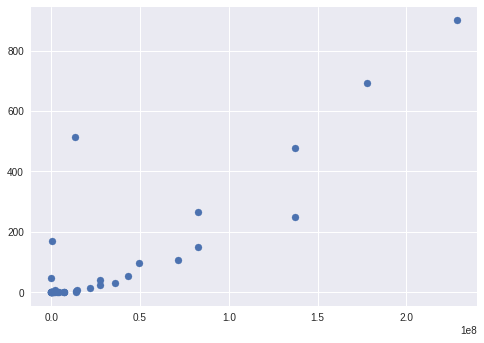

In [61]:
plt.scatter(x_sort, y_sort)

##Define model

In [0]:
def sort_func(x, a, b, c):
  return a * x ** b + c

In [0]:
# x0 = np.ones(3)

##Do optimization

In [0]:
# robust = least_squares(func, x0, loss='soft_l1', args=(x, y))
# res_lsq = least_squares(func, x0, args=(x, y))

popt, pcov = curve_fit(sort_func, x_sort, y_sort)

In [65]:
# print('robust:', np.array_str(robust.x))
# print('least squares', np.array_str(res_lsq.x))

print('curve fit', np.array_str(popt))

curve fit [6.55927057e-12 1.69122714e+00 2.24744831e+01]


##Test model

In [0]:
# y_robust = func(robust.x, x)
# y_least = func(res_lsq.x, x)

y_curv_sort = sort_func(x_sort, *popt)

##Plot results

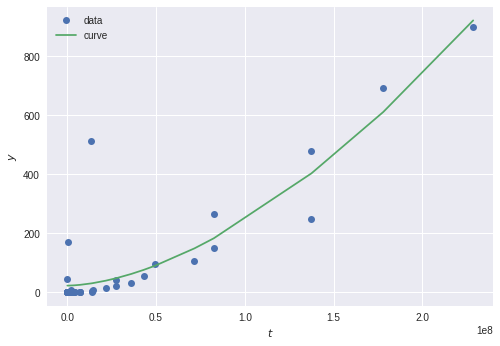

In [67]:
plt.plot(x_sort, y_sort, 'o', label='data')
# plt.plot(x, y_robust, '8', label='robust')
# plt.plot(x, y_least, 'H', label="least")
plt.plot(x_sort, y_curv_sort, label='curve')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend();

#Exchange

##Load Metrics

In [0]:
file = pd.read_csv('/content/gdrive/My Drive/exchange.csv')
grouped = file.groupby(['x']).mean().reset_index()
x_exchange = grouped['x']
y_exchange = grouped['y']

## Plot metrics

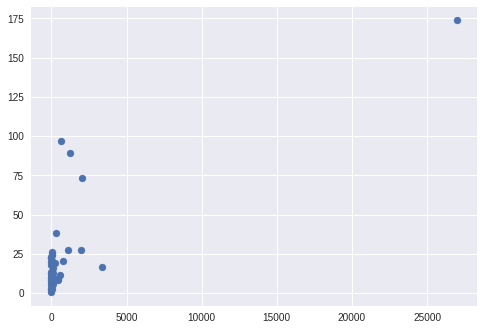

In [69]:
plt.scatter(x_exchange, y_exchange)

## Define model

In [0]:
def exchange_func(x, a, b, c):
  return a * x ** b + c

## Do optimization

In [0]:
popt, pcov = curve_fit(exchange_func, x_exchange, y_exchange)

In [72]:
print('parameters', *popt)

parameters 0.47284270401550454 0.5703326540045224 11.005534014590923


## Test model

In [0]:
y_curv_exchange = exchange_func(x_exchange, *popt)

## Plot results

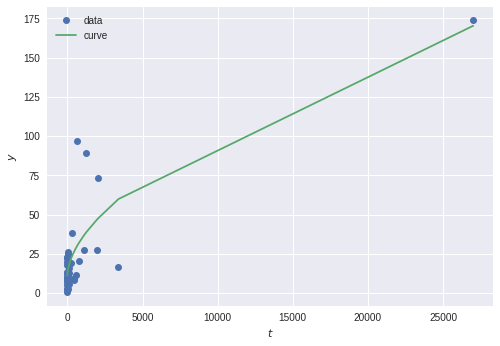

In [74]:
plt.plot(x_exchange, y_exchange, 'o', label='data')
plt.plot(x_exchange, y_curv_exchange, label='curve')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend();

# Sort-Merge Join

## Load metrics

In [0]:
smj_data = pd.read_csv('/content/gdrive/My Drive/sort-merge-join.csv').values

## Plot 3D Metrics

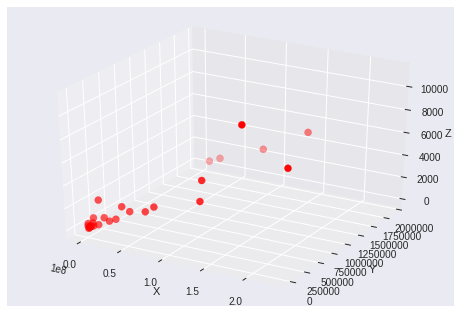

In [76]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(smj_data[:,0], smj_data[:,1], smj_data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

## Define model

In [0]:
X,Y = np.meshgrid(np.arange(np.min(smj_data[:,0]), np.max(smj_data[:,0]) + 100, 1e6), np.arange(np.min(smj_data[:,1]), np.max(smj_data[:,1]) + 100, 100000))

XX = X.flatten()
YY = Y.flatten()

A = np.c_[smj_data[:,0], smj_data[:,1], np.ones(smj_data.shape[0])]
               

## Do optimization

In [0]:
C, _, _, _ = scipy.linalg.lstsq(A, smj_data[:,2])
  


## Test model

In [0]:
Z = C[0]*X + C[1] * Y + C[2]

In [80]:
print('parameters', C)

parameters [ 4.12332836e-05 -3.55064025e-04  2.98094679e+02]


## Plot results

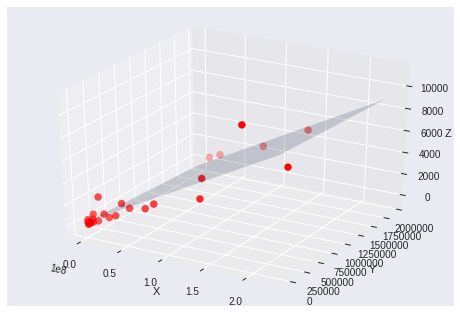

In [81]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(smj_data[:,0], smj_data[:,1], smj_data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

# Broadcast

## Load metrics

In [0]:
file = pd.read_csv('/content/gdrive/My Drive/broadcast_all.csv')
grouped = file.groupby(['x']).mean().reset_index()
x_broadcast = grouped['x']
y_broadcast = grouped['y']

## Plot metrics

[(0, 400), (0, 3000000), Text(0.5, 1.0, 'Zoom window'), None]

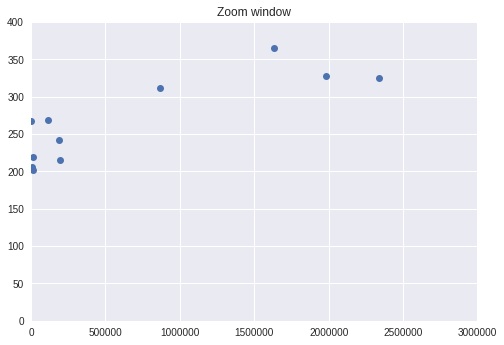

In [83]:
figzoom, axzoom = plt.subplots()
axzoom.plot(x_broadcast, y_broadcast, 'o', label='all')
axzoom.set(xlim=(0, 3000000), ylim=(0, 400), autoscale_on=False, title='Zoom window')

## Define model

In [0]:
def broadcast_func(x, a, b, c):
  return a * x ** b + c

## Do optimization

In [0]:
popt, pcov = curve_fit(broadcast_func, x_broadcast, y_broadcast)

In [86]:
print('parameters', *popt)

parameters 0.00010282094376607356 0.9584981418714688 230.11660651597253


## Test model

In [0]:
y_curv_broadcast = broadcast_func(x_broadcast, *popt)

## Plot results

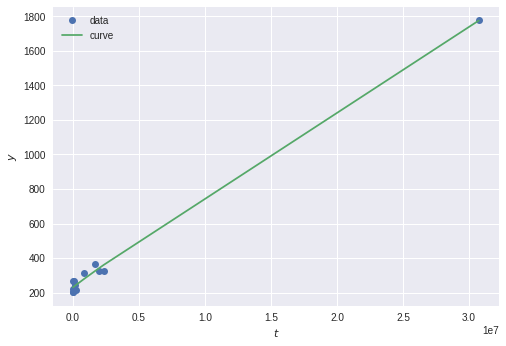

In [88]:
plt.plot(x_broadcast, y_broadcast, 'o', label='data')
plt.plot(x_broadcast, y_curv_broadcast, label='curve')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend();

# Broadcast join

## Load metrics

In [0]:
bj_data = pd.read_csv('/content/gdrive/My Drive/broadcast-join.csv').values

## Plot metrics

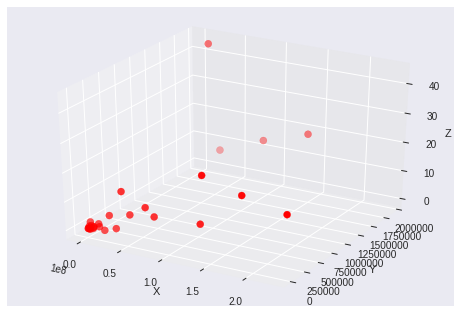

In [90]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(bj_data[:,0], bj_data[:,1], bj_data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

## Define model

In [0]:
X,Y = np.meshgrid(np.arange(np.min(bj_data[:,0]), np.max(bj_data[:,0]) + 100, 1e6), np.arange(np.min(bj_data[:,1]), np.max(bj_data[:,1]) + 100, 100000))

XX = X.flatten()
YY = Y.flatten()

A = np.c_[bj_data[:,0], bj_data[:,1], np.ones(bj_data.shape[0])]
               

## Do optimization

In [0]:
C, _, _, _ = scipy.linalg.lstsq(A, bj_data[:,2])

In [93]:
print('parameters', C)

parameters [7.66720571e-08 7.17273014e-06 2.01043239e+00]


## Test model

In [0]:
Z = C[0]*X + C[1] * Y + C[2]

## Plot results

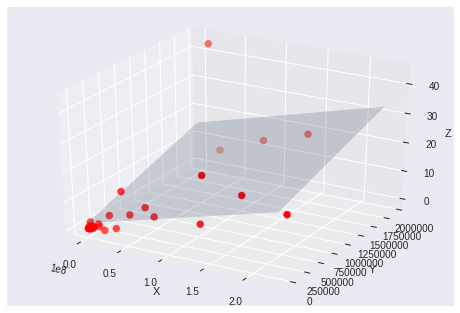

In [95]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(smj_data[:,0], bj_data[:,1], bj_data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()